In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
import random

## Linear Regression

- linear regression fits a straight line through observed data, showing it is linear, and predicting values for new and unobserved data
- machine learning practicioners often use train-test-splits to validate data
- statisticians like to use prediction intervals and correlations
- linear regression should not be used to make predictions outside the range of the observed data

[1.93939394]
4.73333333333334


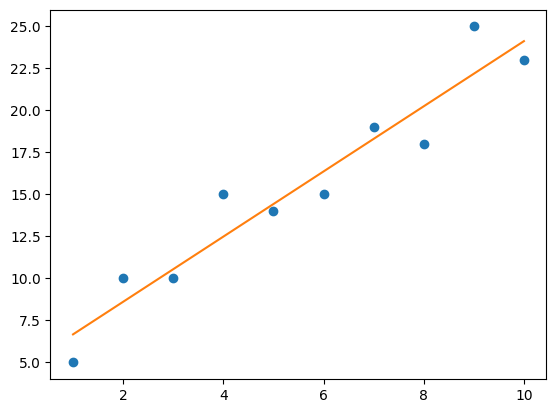

In [21]:
# create dataset of 10 dogs and n pet visits
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
Y = np.array([5,10,10,15,14,15,19,18,25,23])

fit = LinearRegression().fit(X,Y)

m = fit.coef_
b = fit.intercept_
print(m)
print(b)

plt.plot(X,Y,"o")
plt.plot(X, m*X + b)
plt.show()

**Residuals and Squared Errors**
- 2 questions that are fundamental to model training:
- what defines the "best fit"?
- > minimize sum of squared residuals (or errors)
  > residual: difference between predicted y value and actual y value
- what gets the "best fit"?
- > how do we find the best m and b value that create the line with the least sum of squares?

**Machine Learning Training basic concept**
- we provide data and a loss function (or objective function)
- having a loss function that calculates the error of a model
- finding the parameters of the loss function that gives the lowest loss

**Finding the best fit line**
- algorithms: closed form, matrix inversion, matrix decomposition, gradient descent, stochastic gradient descent 

**Closed Form Equation**
- if there is only 1 input variable and few datapoints, we can use closed form equation
- this fits a linear regression by exact calculation
- m = (n*sum(xy) - sum(x) * sum(y)) / (n*sum(x**2) - sum(x)**2)
- b = sum(y)/n - m * sum(x)/n

In [13]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [5,10,10,15,14,15,19,18,25,23]
n = len(x)

m = (n*sum(x[p-1]*y[p-1] for p in x) - sum(x[p-1] for p in x) *
    sum(y[p-1] for p in x)) / (n*sum(x[p-1]**2 for p in x) -
    sum(x[p-1] for p in x)**2)

b = (sum(y[p-1] for p in x) / n) - m * sum(x[p-1] for p in x) / n

print(m, b)

1.9393939393939394 4.7333333333333325


**Inverse Matrix Techniques**
- b = (Xt * X)**(-1) * (Xt * y)
- b = vector of coefficients
- X = matrix of input variable values
- y = vector of output variable values
- finds vector of coefficients given matrix of input variables and vector of output variables
- not so good when amount of data and dimensions are high

In [15]:
# input and output data
# X: have to add column of ones so get the coefficient for the intercept
X = np.array([[1,2,3,4,5,6,7,8,9,10], [1,1,1,1,1,1,1,1,1,1]]).T
Y = np.array([5,10,10,15,14,15,19,18,25,23])

# inverse matrix technique
b = np.linalg.inv((X.T @ X)) @ (X.T @ Y)
print(b)

# use coefficients to predict outcomes based on input data
y_pred = X @ b
print(y_pred)

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


**Matrix Decomposition (QR decomposition)**
- better than inverse matrix if alot of data
- first decompose matrix: X = Q * R
- then calculate coefficients: b = R**(-1) * Qt * y
- QR decomposition is used for linear regression in many scientific libraries, because it scales well

In [19]:
# input and output data
# X: have to add column of ones so get the coefficient for the intercept
X = np.array([[1,2,3,4,5,6,7,8,9,10], [1,1,1,1,1,1,1,1,1,1]]).T
Y = np.array([5,10,10,15,14,15,19,18,25,23])

# decompose using QR decomposition
Q, R = np.linalg.qr(X)
print(Q)
print(R)

# calculate coefficients
b = np.linalg.inv(R) @ (Q.T @ Y)
print(b)

# predict new y based on X input values and b coefficients
print(X @ b)

[[-5.09647191e-02 -5.85540044e-01]
 [-1.01929438e-01 -4.87950036e-01]
 [-1.52894157e-01 -3.90360029e-01]
 [-2.03858877e-01 -2.92770022e-01]
 [-2.54823596e-01 -1.95180015e-01]
 [-3.05788315e-01 -9.75900073e-02]
 [-3.56753034e-01 -1.18221328e-17]
 [-4.07717753e-01  9.75900073e-02]
 [-4.58682472e-01  1.95180015e-01]
 [-5.09647191e-01  2.92770022e-01]]
[[-19.62141687  -2.80305955]
 [  0.          -1.46385011]]
[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


**Gradient Descent**
- imagine your on a mountain landscape
- the landscape are all possible sum of square losses
- we cannot see the entire landscape, only whats right around us
- and we want to get to the lowest point, where the sum of square loss is the lowest
- so we iteratively take steps into the direction where the downward slope is big, hoping to find the lowest point
- partial derivative lets us see the slope for every parameter (ie m and b)
- we step in directions for m and b where the slope goes downward
- as a step size we take a fraction of the slope
- this fraction is the learning rate
- low learning rate: algorithms takes long time but is more precise
- high learning rate: algorithm is faster but is less precise

**Gradient Descent example**
- using gradient descent to find minimum of parabola
- start with a random x value
- get the slope at x using derivative
- substract a fraction of the slope from x
- x will keep decreasing to the bottom of the curve
- if it passes the zero point, x will rise again, but so will slope that is the substracted again
- hypothetically, if x arrives exactly at zero point, slope is zero so nothing is substracted from x. x stays the same for remaining iterations
- also, when x gets closer to zero, the slope gets smaller, so the substracted learning rate is smaller, making x reduce slower

In [26]:
# function for which we find x value that produces the lowest point using gradient descent
def f(x):
    return (x-3)**2 + 4

# partial derivative for x
def dx_f(x):
    return 2*(x-3)

# learning rate
L = 0.1

# number of iterations
n = 20

# start at a random x value
x = random.randint(-15,15)

# gradient descent
for i in range(n):

    # calculate derivative value at x (slope)
    dx = dx_f(x)

    # update x by substracting the learning rate * slope
    x -= L * dx
    print(x, " - ", f(x))

2.2  -  4.64
2.3600000000000003  -  4.409599999999999
2.4880000000000004  -  4.262143999999999
2.5904000000000003  -  4.16777216
2.67232  -  4.1073741824
2.737856  -  4.068719476736
2.7902848  -  4.04398046511104
2.83222784  -  4.028147497671066
2.8657822719999997  -  4.018014398509482
2.8926258176  -  4.011529215046068
2.91410065408  -  4.007378697629484
2.931280523264  -  4.00472236648287
2.9450244186112  -  4.003022314549036
2.95601953488896  -  4.001934281311383
2.964815627911168  -  4.001237940039285
2.9718525023289346  -  4.000792281625142
2.9774820018631476  -  4.000507060240091
2.981985601490518  -  4.000324518553659
2.9855884811924147  -  4.000207691874341
2.9884707849539316  -  4.000132922799579


**Gradient Descent and Linear Regression**
- in linear regression we already know the x and y values, because they are provided as training data
- we need to find m and b to get the best fit line through the x and y values
- slopes for m and b: Partial derivatives for each of these
- we are minimizing the sum of squares
- so we need to take the derivatives of sum of square with respect to m and b
- sum of square: sum(((mx + b) - y)**2)
- dm = sum(2x * ((mx + b) - y))
- db = sum(2 * ((mx + b) - y))

In [11]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [5,10,10,15,14,15,19,18,25,23]

# set initial values for m and b
m = 0.0
b = 0.0

# Learning rate
L = 0.001

# number of iterations
n = 100000

# prepare lists for 3dplot
m_list = []
b_list = []
e_list = [] # errors

# Perform gradient descent
for i in range(n):

    # calc squared error for plotting
    e = sum((((m * x[p-1] + b) - y[p-1])**2 for p in x))
    
    # slope with respect to m
    D_m = sum(2 * x[p-1] * ((m * x[p-1] + b) - y[p-1]) for p in x)

    # slope with respect to b
    D_b = sum(2 * ((m * x[p-1] + b) - y[p-1]) for p in x)

    # update m and b
    m -= L * D_m
    b -= L * D_b

    # add data to lists for plotting
    m_list.append(m)
    b_list.append(b)
    e_list.append(e)

print("m = ", m, " & b = ", b)

m =  1.9393939393939548  & b =  4.733333333333227


**Overfitting and Variance**
- if we fit the model too well to the training data, it will be less good at predicting for new data (overfitting)
- overfit model will have high variance in predicting for new data
- thats why we use bias in a model: prioritizing a method (keeping a straight line) over fitting exactly to the training data
- adding bias to a model counteracts overfitting with underfitting
- Ridge Regression: Adds further bias to regression through adding a penalty
- Lasso regression removes noisy variables

**Stochastic gradient descent**
- it is unlikely that one would do regular gradient descent (batch gradient descent) where one trains on all available data
- better: stochastic gradient descent (mini batch gradient descent) where in each iteration you only train on a sample of the data
- makes computation more efficient, as each iteration on ly trains non a sample of the data
- reduces overfitting: Each iteration there will be a different loss landscape (based on the sample the iteration trains on) which means the algorithm will not settle in the global minimum

In [14]:
# creating dataset
data = {"x":[1,2,3,4,5,6,7,8,9,10],
        "y":[5,10,10,15,14,15,19,18,25,23]}
df = pd.DataFrame(data)
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

n = df.shape[0]  # rows

# Building the model
m = 0.0
b = 0.0

sample_size = 2  # sample size
L = .0001  # The learning Rate
epochs = 100000  # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_pred = m * x_sample + b

    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b

    # print progress
    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

0 0.0285 0.004
10000 2.3535760103759302 1.875233542862461
20000 2.2064820626847936 2.8490987360865336
30000 2.1187637896104516 3.492794671003066
40000 2.0575517119959623 3.913604893634368
50000 2.0131102495570685 4.196016370047888
60000 1.9738021046896421 4.3834487393903965
70000 1.9671248460073738 4.4997500720209285
80000 1.9335007811216114 4.58632752429507
90000 1.9627904251022696 4.65312862635246
y = 1.9285259824870946x + 4.6858119643902025


**Correlation Coefficient**
- same as pearson correlation
- between -1 and 1
- useful to see if there is possible relationship between two variables
- less correlation, less useful for linear regression
- correlation matrix: shows correlation between every pair of variables

In [2]:
# creating dataset
data = {"x":[1,2,3,4,5,6,7,8,9,10],
        "y":[5,10,10,15,14,15,19,18,25,23]}
df = pd.DataFrame(data)

# calculate and print correlations
correlations = df.corr(method="pearson")
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


**Statistical significance**
- consider: is correlation coincidental? or causal?